In [1]:
#Importing all the useful packages for this code
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import math

## General Parameters

In [2]:
fs = 100 #Sampling frequency
Ts = 1/fs #Sampling interval
f_nyq = fs/2 #Nyquist frequency 

fe = 0.3 #Excitation frequency of the signal
we = 2*np.pi*0.3 #Excitation angular frequency (angular frequency of the signal)
Te = 1/fe #Period of the signal

Filter to implement :

<center>Windowed-sinc function with a Blackman window</center>

Equation :
\begin{equation}
y[i] = K \frac{sin(2\pi f_{c}(i-M/2))}{i - M/2} \left [ 0.42 - 0.5 cos(\frac{2\pi i}{M}) + 0.08cos(\frac{4\pi i}{M} )\right ]
\end{equation}

Characteristic of this filter : 

In [3]:
t_min = 0 
t_max = 100

r = 4 #Parameter associated to the Blackman window
N = (t_max-t_min)/Ts
BW = 0.01#Transition band's length 

M = math.ceil(r/BW) #Transition band's length (unitless)

fc = 0.14 #Cutoff frequency
fp = fc - (BW*fs)  #Pass frequency 

time = np.linspace(t_min,t_max,int(N)) #Time axis

## System's Noisy Signal Response 

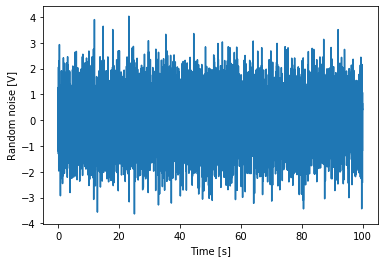

In [4]:
#Generating random noise from a Gaussian distribution
noise = np.random.normal(0,1,int(N))

plt.plot(time,noise)
plt.xlabel('Time [s]')
plt.ylabel('Random noise [V]')
plt.show()

In [5]:
#System's response without the noise drawn randomly from a normal distribution

def sin(w, t): #Defining a function to create sine waves
    return np.sin(w*t)
def cos(w, t): #Defining a function to create cosine waves
    return np.cos(w*t)

signal = 0.1*sin(0.4,time)  #Small input signal 

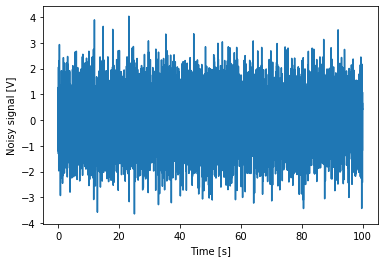

In [6]:
#System's response (noisy signal)
noisy_sig = noise + 0.1*signal

plt.plot(time,noisy_sig) #Plotting that response
plt.xlabel('Time [s]')
plt.ylabel('Noisy signal [V]')
plt.show()

## Reference Signals from Oscillator

Sine component : 

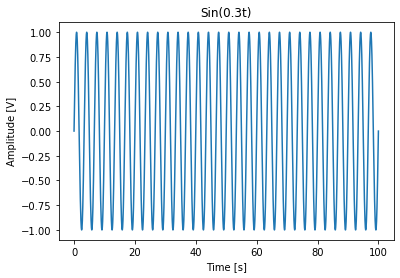

In [7]:
v_ref_sin = sin(we,time) #Sine component of the signal generated by the oscillator with an angular frequency of 0.4 rad/s 

plt.plot(time, v_ref_sin) #Plotting the signal
plt.title('Sin('+str(fe)+'t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.show()

Cosine component : 

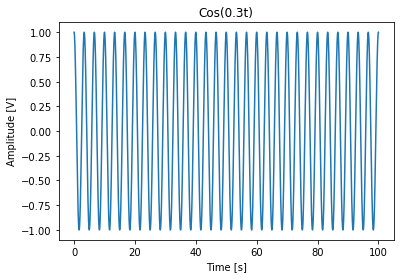

In [8]:
v_ref_cos = cos(we,time) #Cosine component of the signal generated by the oscilloscope with an angular frequency of 0.4 rad/s 

plt.plot(time, v_ref_cos) #Plotting the signal
plt.title('Cos('+str(fe)+'t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.show()

## Multiply Stages

Output with the sine reference signal

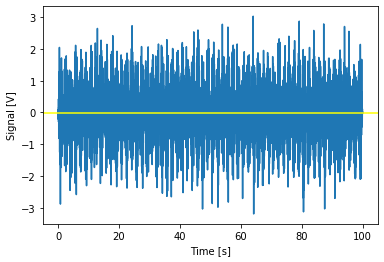

The mean voltage is -0.008196986084962232 V.


In [9]:
X = noisy_sig * v_ref_sin #Amplified sine component of the reference signal

plt.plot(time,X) #Plotting that amplified signal
plt.xlabel('Time [s]')
plt.ylabel('Signal [V]')
plt.axhline(y=np.mean(X), xmin=0, xmax=100,color='yellow')
plt.show()

print('The mean voltage is', np.mean(X), 'V.')

Output with the cosine reference signal

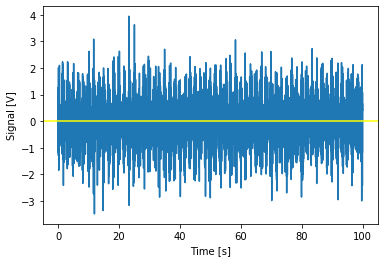

The mean voltage is -0.0005852921851674069 V.


In [10]:
Y = noisy_sig*v_ref_cos #Amplified cosine component of the reference signal

plt.plot(time,Y) #Plotting that amplified signal
plt.xlabel('Time [s]')
plt.ylabel('Signal [V]')
plt.axhline(y=np.mean(Y), xmin=0, xmax=100,color='yellow')
plt.show()

print('The mean voltage is', np.mean(Y), 'V.')

## Low Pass Filter : Windowed-Sinc Filter with a Blackman Window

<center>Implementing the filter</center>

Equation :
\begin{equation}
y[i] = K \frac{sin(2\pi f_{c}(i-M/2))}{i - M/2} \left [ 0.42 - 0.5 cos(\frac{2\pi i}{M}) + 0.08cos(\frac{4\pi i}{M} )\right ]
\end{equation}

Normalizing the time axis : 

In [11]:
t_norm = time/Ts #sample number

<center>Tom Roelandts's code</center>

In [12]:
from __future__ import division
 
import numpy as np
 
fc = 0.1  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).
N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # Make sure that N is odd.
n = np.arange(N)
 
# Compute sinc filter.
h = np.sinc(2 * fc * (n - (N - 1) / 2))
 
# Compute Blackman window.
w = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + \
    0.08 * np.cos(4 * np.pi * n / (N - 1))
 
# Multiply sinc filter by window.
h = h * w
 
# Normalize to get unity gain.
h = h / np.sum(h)

Filtered : X 

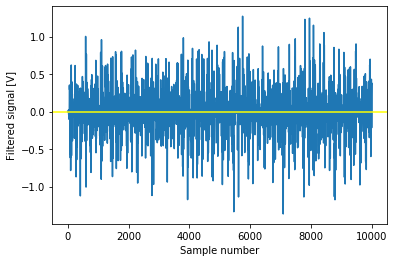

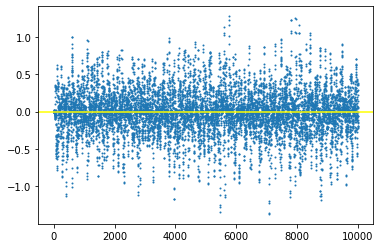

In [13]:
X = np.convolve(X, h)
plt.plot(t_norm,X[:10000])
plt.xlabel('Sample number')
plt.ylabel('Filtered signal [V]')
plt.axhline(y=np.mean(X), xmin=0, xmax=100,color='yellow')
plt.show()

plt.scatter(t_norm,X[:10000],s=1)
plt.axhline(y=np.mean(X), xmin=0, xmax=100,color='yellow')
plt.show()

Filtered : Y

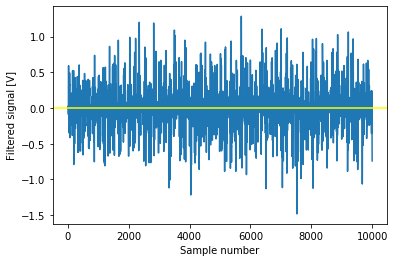

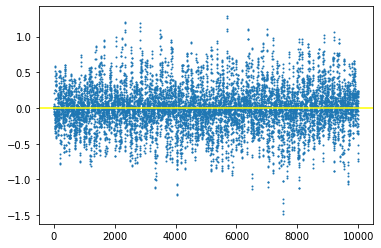

In [14]:
Y = np.convolve(Y, h)

plt.plot(t_norm,Y[:10000])
plt.xlabel('Sample number')
plt.ylabel('Filtered signal [V]')
plt.axhline(y=np.mean(Y), xmin=0, xmax=100,color='yellow')
plt.show()

plt.scatter(t_norm,Y[:10000],s=1)
plt.axhline(y=np.mean(Y), xmin=0, xmax=100,color='yellow')
plt.show()

## Magnitude and Phase of this Signal

Magnitude if constant in time : 

In [15]:
mag = ((np.array(X[:10000])**2)+(np.array(Y[:10000])**2))**(1/2)
mag_avg = np.average(((np.array(X[:10000])**2)+(np.array(Y[:10000])**2))**(1/2))
print('The average magnitude that is measured is',round(mag_avg,4),'V.')

The average magnitude that is measured is 0.3373 V.


Phase if constant in time : 

In [16]:
phase = max(np.arctan(np.array(Y)[1:N]/np.array(X)[1:N]))
print('The average phase that is measured is',round(phase,1),'rad.')

The average phase that is measured is 1.6 rad.


## Power spectrum 

In [17]:
fft_signal_X = abs(np.fft.fft(X))
fft_signal_Y = abs(np.fft.fft(Y))
fft_signal_mag = abs(np.fft.fft(mag))

freq = np.fft.fftfreq(len(time))

Filtered : X

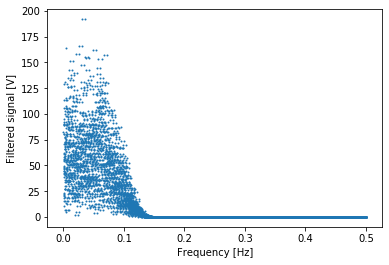

In [18]:
plt.scatter(abs(freq),fft_signal_X[:len(freq)],s=1)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Filtered signal [V]')
plt.show()

In [19]:
Filtered : Y 

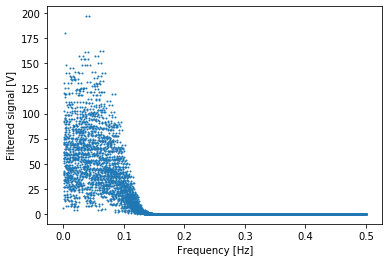

In [20]:
plt.scatter(abs(freq),fft_signal_Y[:len(freq)],s=1)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Filtered signal [V]')
plt.show()

Magnitude of the filtered signal 

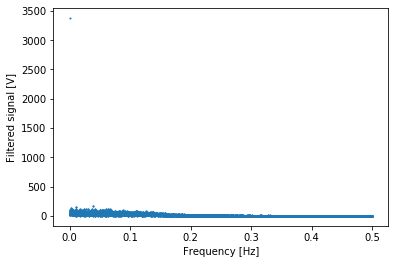

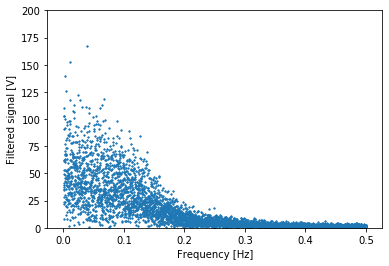

In [21]:
plt.scatter(abs(freq),fft_signal_mag[:len(freq)],s=1)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Filtered signal [V]')
plt.show()

plt.scatter(abs(freq),fft_signal_mag[:len(freq)],s=1)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Filtered signal [V]')
plt.ylim(0,200)
plt.show()